In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cancer_df = pd.read_excel("CancerCombinedFile.xlsx")
cancer_df

,Cancer_id,Name,Category,State_name,Race_name,Count,Percentage population below poverty,Percentage population insured,Population
0,20010,Lip,Oral Cavity and Pharynx,Alabama,American Indian or Alaska Native,0,18.4,89.2,4874747
1,20010,Lip,Oral Cavity and Pharynx,Alabama,Asian or Pacific Islander,0,18.4,89.2,4874747
2,20010,Lip,Oral Cavity and Pharynx,Alabama,White,55,18.4,89.2,4874747
3,20010,Lip,Oral Cavity and Pharynx,Alabama,Other Races and Unknown combined,0,18.4,89.2,4874747
4,20020,Tongue,Oral Cavity and Pharynx,Alabama,American Indian or Alaska Native,0,18.4,89.2,4874747
...,...,...,...,...,...,...,...,...,...
9914,36020,Kaposi Sarcoma,Kaposi Sarcoma,Wyoming,White,0,11.6,86.6,579315
9915,36020,Kaposi Sarcoma,Kaposi Sarcoma,Wyoming,Other Races and Unknown combined,0,11.6,86.6,579315
9916,37000,Miscellaneous,Miscellaneous,Wyoming,Asian or Pacific Islander,0,11.6,86.6,579315
9917,37000,Miscellaneous,Miscellaneous,Wyoming,White,95,11.6,86.6,579315


In [21]:
cancer_df.Race_name.value_counts()

White                               2567
American Indian or Alaska Native    2001
Black or African American           1834
Other Races and Unknown combined    1759
Asian or Pacific Islander           1758
Name: Race_name, dtype: int64

C:\Users\music\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


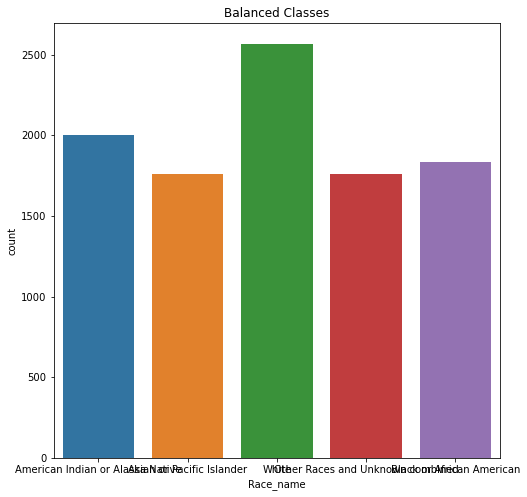

In [4]:
#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Race_name', data=cancer_df)
plt.title('Balanced Classes')
plt.show()

C:\Users\TTHic\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


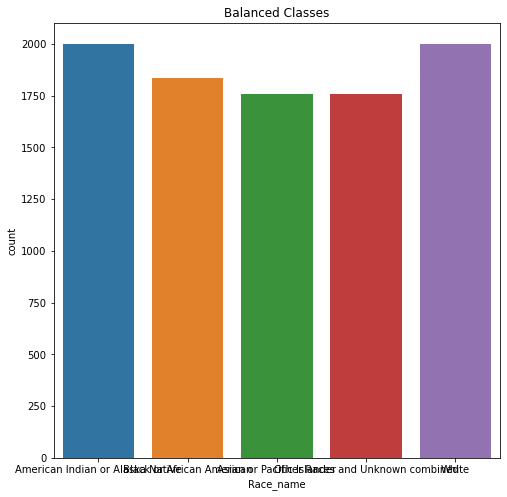

In [22]:
# Shuffle the Dataset.
shuffled_df = cancer_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
nonwhite_df = shuffled_df.loc[shuffled_df['Race_name'] != "White"]

#Randomly select 492 observations from the non-fraud (majority class)
with_white_df = shuffled_df.loc[shuffled_df['Race_name'] == "White"].sample(n=2000,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([nonwhite_df , with_white_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Race_name', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [ ]:
## 7 types of female cancers: Ovary, Uterus,NOS, Vagina, Vulva, Cervix Uteri, Corpus Uteri, and Other Female Genital Organs

In [25]:
normalized_df.Name.unique()

array(['Miscellaneous', 'Stomach', 'Other Male Genital Organs',
       'Male Breast', 'Eye and Orbit', 'Female Breast', 'Testis',
       'Vagina', 'Lip', 'Tongue', 'Chronic Lymphocytic Leukemia',
       'Prostate', 'Oropharynx', 'Other Female Genital Organs',
       'Other Oral Cavity and Pharynx', 'Pleura', 'Colon and Rectum',
       'Soft Tissue including Heart', 'Hodgkin Lymphoma', 'Brain',
       'Melanoma of the Skin', 'Tonsil', 'Acute Lymphocytic Leukemia',
       'Other Digestive Organs', 'Other Urinary Organs', 'Salivary Gland',
       'Larynx', 'Trachea, Mediastinum and Other Respiratory Organs',
       'Peritoneum, Omentum and Mesentery',
       'Urinary Bladder, invasive and in situ', 'Other Biliary', 'Ureter',
       'Myeloma', 'Ovary', 'Anus, Anal Canal and Anorectum',
       'Kidney and Renal Pelvis', 'Retroperitoneum',
       'Gum and Other Mouth', 'Non-Hodgkin Lymphoma', 'Hypopharynx',
       'Floor of Mouth', 'Thyroid', 'Cranial Nerves Other Nervous System',
       'Co

In [33]:
female_cancer_df = normalized_df[normalized_df["Name"].isin("Vagina", "Ovary", "Uterus, NOS", "Vulva", "Cervix Uteri", "Corpus Uteri", "Other Female Genital Organs")] 

TypeError: isin() takes 2 positional arguments but 8 were given